## Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Importing Data

In [69]:
spam=pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [70]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Cleaning data

In [71]:
spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [72]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
names={'v1':'spam','v2':'email'}

In [74]:
spam.rename(columns=names, inplace=True)

In [75]:
spam.head()

,spam,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [76]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [77]:
spam.describe()

,spam,email
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Cleaning Data

In [78]:
spam.isnull().sum()

spam     0
email    0
dtype: int64

In [79]:
spam.duplicated().sum()

403

In [80]:
spam.drop_duplicates(inplace=True)

In [81]:
spam.describe()

,spam,email
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


## Data Visualisation

<Axes: xlabel='spam', ylabel='count'>

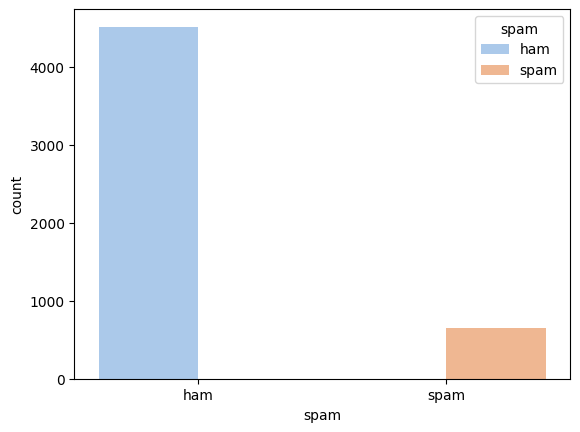

In [82]:
sns.countplot(x='spam',palette='pastel', hue='spam', data=spam)

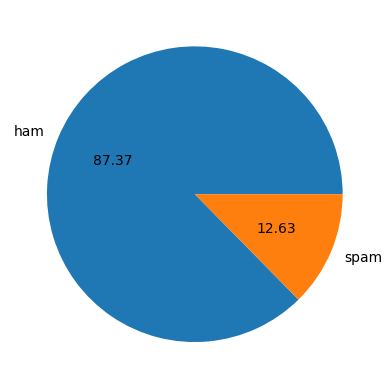

In [83]:
plt.pie(spam['spam'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [84]:
spam.head()

,spam,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
#changing to numerical values
spam.spam = [0 if value=="ham" else 1 for value in spam.spam]

In [86]:
#importing libraries for cleaning data

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

## Data Splitting

In [87]:
x=spam['email']
y=spam['spam']

In [88]:
#importing libraries for splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=3)

## TFD-IDF Vectorization

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [90]:
x_train_features

<4135x7378 sparse matrix of type '<class 'numpy.float64'>'
	with 31488 stored elements in Compressed Sparse Row format>

## Training the Model

In [91]:
#importing libraries for training the model
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

##### 1.) Logistic Regression

In [92]:
logR = LogisticRegression()
logR.fit(x_train_features,y_train)

LogisticRegression()

In [93]:
pred_train = logR.predict(x_train_features)
accuracy_train = accuracy_score(y_train, pred_train)

pred_test = logR.predict(x_test_features)
accuracy_test = accuracy_score(y_test, pred_test)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_train * 100))
print('Accuracy on test data: {} %'.format(accuracy_test * 100))

Accuracy on training data: 96.2273276904474 %
Accuracy on test data: 96.0348162475822 %


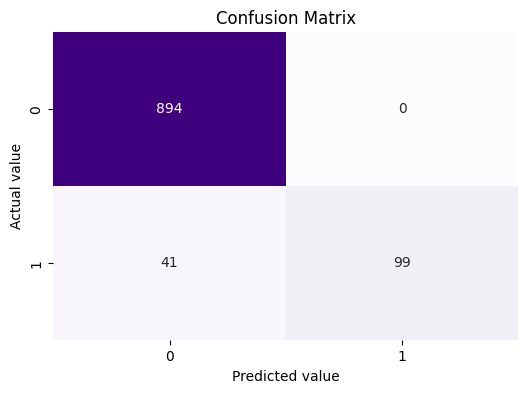

In [94]:
#CONFUSION MATRIX

conf_matrix=confusion_matrix(y_test,pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Purples",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

##### 2.) SVC Model

In [95]:
svc=LinearSVC()
svc.fit(x_train_features, y_train)

C:\Users\123\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [96]:
# Select SVC model
pred_train = svc.predict(x_train_features)
accuracy_train = accuracy_score(y_train, pred_train)

pred_test = svc.predict(x_test_features)
accuracy_test = accuracy_score(y_test, pred_test)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_train * 100))
print('Accuracy on test data: {} %'.format(accuracy_test * 100))

Accuracy on training data: 99.95163240628779 %
Accuracy on test data: 98.35589941972921 %


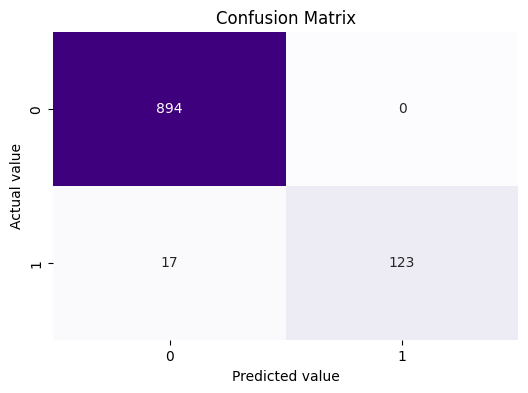

In [97]:
#CONFUSION MATRIX

conf_matrix=confusion_matrix(y_test,pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Purples",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

###### 3.) Naives-Bayes Model

In [98]:
nb=GaussianNB()
nb.fit(x_train_features.toarray(), y_train)

GaussianNB()

In [99]:
pred_train = nb.predict(x_train_features.toarray())
accuracy_train = accuracy_score(y_train, pred_train)

pred_test = nb.predict(x_test_features.toarray())
accuracy_test = accuracy_score(y_test, pred_test)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_train * 100))
print('Accuracy on test data: {} %'.format(accuracy_test * 100))

Accuracy on training data: 94.46191051995163 %
Accuracy on test data: 88.00773694390716 %


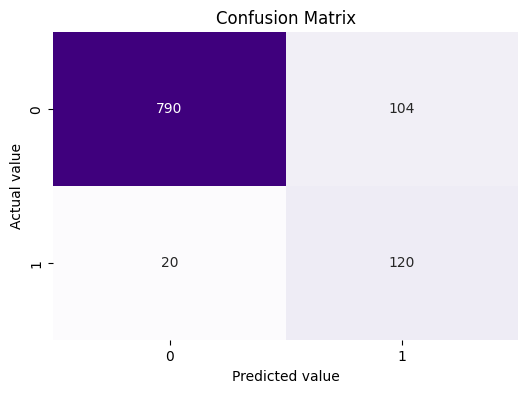

In [100]:
#CONFUSION MATRIX

conf_matrix=confusion_matrix(y_test,pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Purples",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()